In [1]:
# General libraries
import os
import pandas as pd
pd.set_option('display.max_columns', None)
from tqdm import tqdm
tqdm.pandas()

# Chemical Data Processing
import rdkit 
from rdkit import Chem
from rdkit.Chem import AllChem, PandasTools, rdDistGeom
print(rdkit.__version__)
PandasTools.RenderImagesInAllDataFrames(images=True)

2024.03.5


# Read in Data

40290


,Dataset,ID,Ligand_Instance,PDB_ID,Standardized_SMILES,Name,Pocket,ATP_Site,Peripheral,Num_H_Atoms_ProtBoundConf,Num_Resolved_Atoms,Num_Not_Resolved_Atoms,2D_Mol,2D_Mol_H
0,CF,F001,001_B_2,NaN,[H]O[C@]1([H])C([H])([H])[C@@]([H])(C2=NC(C3=C...,"(3R,5S)‐5‐[3‐(4‐fluorophenyl)‐1,2,4‐oxadiazol‐...",X,1.0,1.0,13.0,18.0,0.0,,

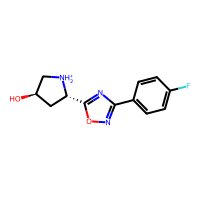
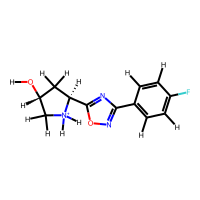

In [2]:
# Data from 2_Data_Preparation_and_Overlap.ipynb
df = pd.read_excel(os.path.join('Data', '_Molecule_Data_Combined.xlsx')).reset_index(drop=True) 

# Add molecule (with explicit hydrogens)
PandasTools.AddMoleculeColumnToFrame(df, smilesCol="Standardized_SMILES", molCol="2D_Mol")
df["2D_Mol_H"] = df["2D_Mol"].apply(lambda mol: Chem.AddHs(mol) if mol is not None else None)

print(len(df))
df.head(1)

In [3]:
# # WORKAROUND
# df = df[df['Dataset'].isin(['CF', 'PDB', 'ChEMBL_PKA', 'PKIs', 'OralDrugs'])] # Excluding 'ChEMBL_Kinases'
# print(len(df)) 

# Conformer Generation with RDKit's ETKDGv3 Method

In [4]:
# # For Bookkeeping only: Parameters for conformer generation

# # Print default parameter values 
# print("Default parameter values:\n" + "-"*40)
# default_params = rdDistGeom.EmbedParameters()
# for attr in dir(default_params):
#     if not attr.startswith("_") and not callable(getattr(default_params, attr)):
#         print(f"{attr}: {getattr(default_params, attr)}")

# # Function to print parameters of pre-configured parameter objects
# def print_params(param_func):
#     name = param_func.__name__                  # Extract function name (e.g., "ETKDG")
#     params = param_func()                       # Call the function to get parameters
#     print(f"\n{name} Parameters:\n" + "-"*40)
#     for attr in dir(params):
#         if not attr.startswith("_") and not callable(getattr(params, attr)):
#             print(f"{attr}: {getattr(params, attr)}")

# # Print parameters for different ETKDG versions
# for preconfig_params in [AllChem.KDG,     AllChem.ETDG,     AllChem.ETKDG,   AllChem.ETKDGv2, # Riniker2015
#                          AllChem.ETKDGv3, AllChem.srETKDGv3                                   # Wang2020
#                          ]:
#     print_params(preconfig_params)

ETversion: 2
boundsMatForceScaling: 1.0
boxSizeMult: 2.0
clearConfs: True
embedFragmentsSeparately: True
enableSequentialRandomSeeds: False
enforceChirality: True
forceTransAmides: True
ignoreSmoothingFailures: False
maxIterations: 0
maxIters: 10000
numThreads: 0
numZeroFail: 1
onlyHeavyAtomsForRMS: True
optimizerForceTol: 0.001
pruneRmsThresh: -1.0
randNegEig: True
randomSeed: 61453
symmetrizeConjugatedTerminalGroupsForPruning: True
trackFailures: False
useBasicKnowledge: True
useExpTorsionAnglePrefs: True
useMacrocycle14config: True
useMacrocycleTorsions: True
useRandomCoords: True
useSmallRingTorsions: False
useSymmetryForPruning: True
verbose: False


 34%|███▍      | 13669/40290 [28:13<16:50, 26.35it/s][17:32:54] UFFTYPER: Unrecognized charge state for atom: 15
[17:32:54] UFFTYPER: Unrecognized charge state for atom: 16
 35%|███▌      | 14200/40290 [28:27<11:12, 38.81it/s][17:33:08] UFFTYPER: Unrecognized charge state for atom: 1
[17:33:08] UFFTYPER: Unrecognized charge state for atom: 16
 58%|█████▊    | 23375/40290 [1:58:39<07:30, 37.56it/s][19:03:20] UFFTYPER: Unrecognized charge state for atom: 12
[19:03:20] UFFTYPER: Unrecognized charge state for atom: 12
[19:03:20] UFFTYPER: Unrecognized charge state for atom: 12
 58%|█████▊    | 23379/40290 [1:58:39<07:26, 37.85it/s][19:03:20] UFFTYPER: Unrecognized charge state for atom: 1
[19:03:20] UFFTYPER: Unrecognized charge state for atom: 1
[19:03:20] UFFTYPER: Unrecognized charge state for atom: 1
 58%|█████▊    | 23383/40290 [1:58:39<07:23, 38.08it/s][19:03:20] UFFTYPER: Unrecognized charge state for atom: 3
[19:03:20] UFFTYPER: Unrecognized charge state for atom: 3
[19:03:20] UFFT

,Dataset,ID,Ligand_Instance,PDB_ID,Standardized_SMILES,Name,Pocket,ATP_Site,Peripheral,Num_H_Atoms_ProtBoundConf,Num_Resolved_Atoms,Num_Not_Resolved_Atoms,2D_Mol,3D_Mol_H
0,CF,F001,001_B_2,NaN,[H]O[C@]1([H])C([H])([H])[C@@]([H])(C2=NC(C3=C...,"(3R,5S)‐5‐[3‐(4‐fluorophenyl)‐1,2,4‐oxadiazol‐...",X,1.0,1.0,13.0,18.0,0.0,,

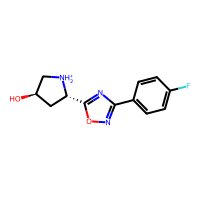
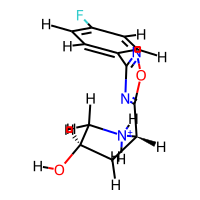

In [5]:
# Set the parameters to the pre-configured parameter object ETKDGv3 [Wang2020]
conf_gen_params = AllChem.ETKDGv3()

# Modify some settings
conf_gen_params.numThreads       = 0       # Use the maximum number of threads allowed on your system.
conf_gen_params.maxIters         = 10000
conf_gen_params.enforceChirality = True    # Is already the default
conf_gen_params.randomSeed       = 0xf00d  # To ensure reproducibility 
conf_gen_params.useRandomCoords  = True    # Is more robust, but also more time-consuming 

# Print the parameters to be employed for conformer generation
for attr in dir(conf_gen_params):
    if not attr.startswith("_") and not callable(getattr(conf_gen_params, attr)):
        print(f"{attr}: {getattr(conf_gen_params, attr)}")


def generate_conformer(molh, conf_gen_params=conf_gen_params):
    # Embed the molecule using AllChem.EmbedMolecule
    AllChem.EmbedMolecule(molh, conf_gen_params)
    return molh

df["3D_Mol_H"] = df["2D_Mol_H"].progress_apply(generate_conformer)

# Drop the modified 2D_Mol_H column 
df = df.drop(['2D_Mol_H'], axis=1)

df.head(1)

# Save to a .sdf file

In [6]:
desc_path      = os.path.join('Analysis', 'Descriptors')
insilico_path  = os.path.join(desc_path,  'in_silico_Generated_Conformations')


def save_dataframe_to_sdf(dataset, filename, molColName, idName):
    """
    Helper function to save a DataFrame  as an SDF file.

    Parameters:
    dataset (DataFrame):  The DataFrame to be saved.
    filename (str):       The path and name of the SDF file.
    molColName (str):     The name of the molecule column.
    idName (str):         The column to serve as the molecule title.
    sdf_cols (list):      List of properties to export.
    """

    sdf_cols = [col for col in dataset.columns if col not in ('SMILES', '2D_Mol')]

    PandasTools.WriteSDF(dataset,                    # Sub-Dataframe to be saved
                         filename,                   # Path and name of .sdf file
                         molColName=molColName,      # Name of the molecule column
                         idName=idName,              # Select a column to serve as molecule title
                         properties=sdf_cols,        # List of properties to export
                         allNumeric=False,           # Automatically include all numeric columns in the output
                         forceV3000=True             # Use the .sdf file V3000 format
                         )
    

def save_dataframe_chunk_to_sdf(df, 
                          sdffile_path = os.path.join(insilico_path, 'sdf_Files'), 
                          molColName   = '3D_Mol_H', 
                          idName       = 'ID'):
    """
    Save a DataFrame chunk as an SDF file.

    Parameters:
    df (DataFrame):     The DataFrame to be saved.
    sdffile_path (str): The path for the SDF files.
    molColName (str):   The name of the molecule column. Default is '3D_Mol_H'.
    idName (str):       The column to serve as the molecule title. Default is 'ID'.
    """
    
    chunk_size = 999

    # Split the DataFrame into the individual datasets
    for dataset_name in df['Dataset'].unique():

        dataset = df[df['Dataset'] == dataset_name]

        # Split the subset into chunks of max. 999 molecules each
        num_chunks = (len(dataset) + chunk_size - 1) // chunk_size  # Calculate number of chunks

        for i in range(num_chunks):
            chunk = dataset.iloc[i * chunk_size:(i + 1) * chunk_size]

            if len(chunk) < chunk_size:
                filename = os.path.join(sdffile_path, f'In_silico_Generated_Conformations_{dataset_name}.sdf')
            else:
                filename = os.path.join(sdffile_path, f'In_silico_Generated_Conformations_{dataset_name}_Part_{i + 1}.sdf')

            # Save the chunk as an SDF file
            save_dataframe_to_sdf(chunk, filename, molColName, idName)

# Example usage
save_dataframe_chunk_to_sdf(df)